<a href="https://colab.research.google.com/github/afonsoandrerocha/recomendacao_filmes/blob/master/recomendacao_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
from sklearn.cluster import KMeans


In [6]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
modelo.labels_


array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [7]:
modelo.cluster_centers_

array([[ 0.03426107, -0.21160725, -0.16352028, -0.25266291, -0.26916501,
         0.19785438, -0.27497648,  0.12044803,  0.08996074, -0.16633861,
        -0.08975732, -0.1118575 , -0.10145195,  0.01555587, -0.21898812,
         0.17611834, -0.09950676, -0.48675406,  0.0768747 ,  0.04399213],
       [-0.05917995,  0.1888261 ,  1.14156905,  1.8540311 ,  2.01876549,
         0.1255972 , -0.32407696, -0.19644305, -0.6031593 ,  1.20699182,
        -0.09492563, -0.26133728,  0.50134331,  0.29197797, -0.12738431,
        -0.27258764,  0.22062636, -0.46254482, -0.16599152, -0.08492502],
       [-0.05917995,  0.44876427, -0.12233727, -0.23149977, -0.26718271,
        -0.56196241,  0.85146167, -0.21352287,  0.0555834 , -0.14600057,
         0.27281614,  0.40738494,  0.02159051, -0.17710153,  0.6165092 ,
        -0.31911446,  0.14891275,  1.45486977, -0.11714275, -0.0717781 ]])

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_, 
             columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.034261,-0.211607,-0.163520,-0.252663,-0.269165,0.197854,-0.274976,0.120448,0.089961,-0.166339,-0.089757,-0.111858,-0.101452,0.015556,-0.218988,0.176118,-0.099507,-0.486754,0.076875,0.043992
1,-0.059180,0.188826,1.141569,1.854031,2.018765,0.125597,-0.324077,-0.196443,-0.603159,1.206992,-0.094926,-0.261337,0.501343,0.291978,-0.127384,-0.272588,0.220626,-0.462545,-0.165992,-0.084925
2,-0.059180,0.448764,-0.122337,-0.231500,-0.267183,-0.561962,0.851462,-0.213523,0.055583,-0.146001,0.272816,0.407385,0.021591,-0.177102,0.616509,-0.319114,0.148913,1.454870,-0.117143,-0.071778


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f7b911a58>,
      dtype=object)

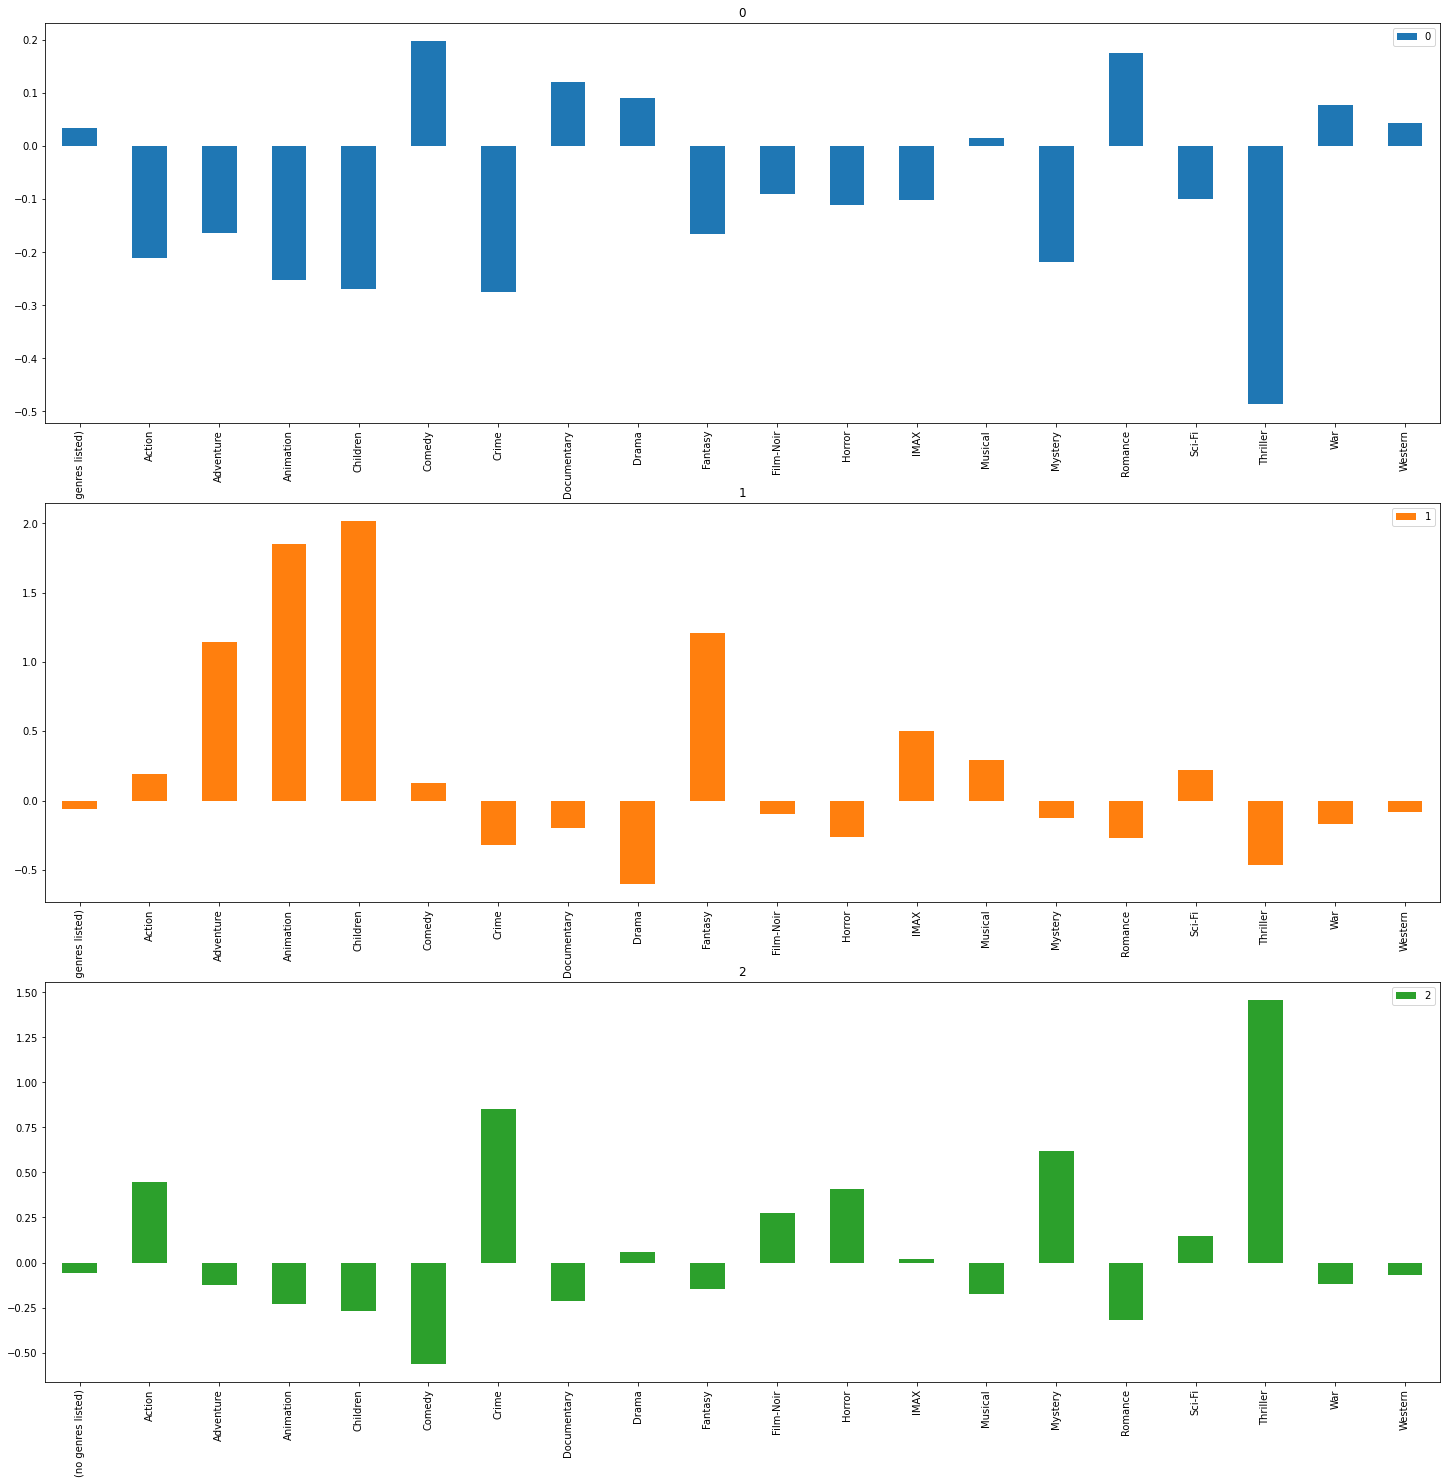

In [9]:
grupos.transpose().plot.bar(subplots=True,
                figsize=(25,25),
                sharex=False)

In [10]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2289,3036,"Quest for Fire (Guerre du feu, La) (1981)",Adventure|Drama,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8315,107013,"Christmas Carol, A (1977)",Drama|Fantasy,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
8745,127202,Me and Earl and the Dying Girl (2015),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2004,2668,Swamp Thing (1982),Horror|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
958,1259,Stand by Me (1986),Adventure|Drama,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6372,49957,"History Boys, The (2006)",Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1486,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6791,60514,Journey to the Center of the Earth (2008),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
140,168,First Knight (1995),Action|Drama|Romance,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
502,583,Dear Diary (Caro Diario) (1994),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 13.654279 ,  61.401505 ],
       [ 42.96689  , -18.06609  ],
       [ 15.933637 , -17.962318 ],
       ...,
       [-10.3393545,  16.72243  ],
       [-58.893234 ,  15.241241 ],
       [ 28.662115 ,   7.258347 ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


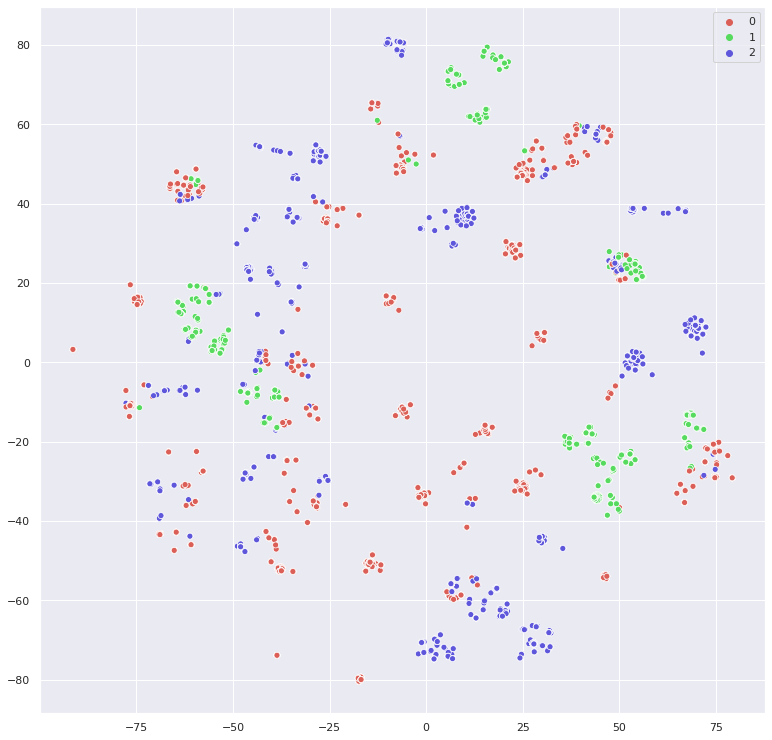

In [13]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette=sns.color_palette('hls', 3))

In [14]:
modelo_2 = KMeans(n_clusters=20)

modelo_2.fit(generos_escalados)

grupos = pd.DataFrame(modelo_2.cluster_centers_,
                      columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.428529,-0.383197,-0.228184,-0.270451,0.480100,-0.374632,-0.217489,0.339469,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.272983,-0.435211,-0.202020,-0.132065
1,-0.059180,0.420926,0.863129,0.366241,-0.270451,0.060345,-0.303678,-0.206265,-0.211145,3.392017,-0.094926,-0.085845,-0.128397,-0.188419,-0.200450,0.105292,0.239032,-0.296886,-0.202020,-0.132065
2,-0.059180,-0.261630,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.907869,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.045033,-0.202020,-0.132065
3,-0.059180,-0.305895,-0.385949,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.294267,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.447750,-0.202020,-0.132065
4,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
5,-0.059180,1.026999,1.121377,0.628865,0.482962,-0.441032,-0.162713,0.026329,-0.492945,0.801904,-0.094926,-0.081328,7.788339,0.089846,-0.088586,-0.288731,0.970137,0.068485,-0.071589,-0.034545
6,-0.059180,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
7,-0.059180,-0.152234,-0.268514,-0.161059,-0.239146,-0.528722,0.489914,-0.217489,0.138996,-0.003936,-0.094926,0.506042,-0.128397,-0.188419,4.000218,-0.144205,0.039332,1.173369,-0.202020,-0.132065
8,-0.059180,-0.256547,-0.355311,-0.244530,-0.270451,-0.369234,-0.197113,-0.217489,-0.579444,-0.111417,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.359215,-0.334435,0.661641,-0.202020,-0.132065
9,-0.059180,1.020850,-0.266185,-0.242877,-0.270451,-0.508740,1.975368,-0.217489,0.163069,-0.266558,-0.094926,-0.302182,-0.128397,-0.188419,-0.249986,-0.297707,-0.277115,2.035586,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f7b6525f8>,
      dtype=object)

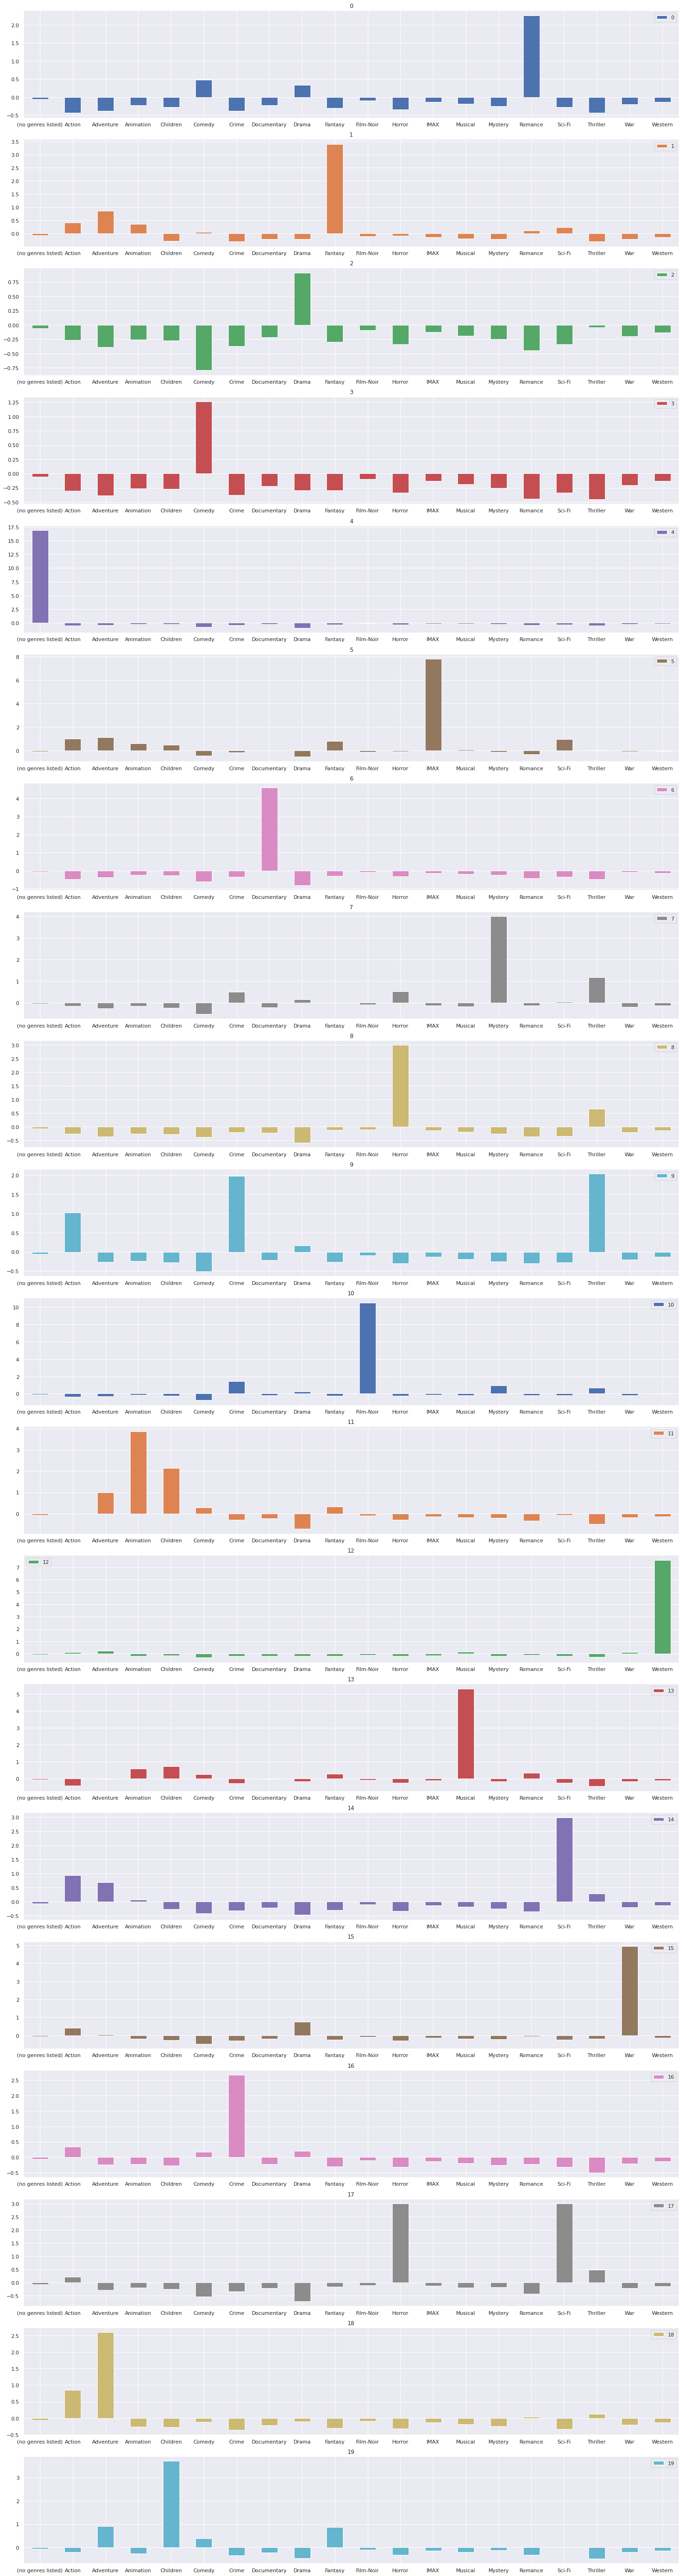

In [15]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,100),
                            sharex=False,
                            rot=0)

In [16]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [17]:
kmeans(20, generos_escalados)

[20, 55820.72745324689]

In [18]:
kmeans(3, generos_escalados)

[3, 168249.64312017112]

In [19]:
resultado = [kmeans(numero_de_clusters, generos_escalados) for numero_de_clusters in range(1, 41)]

In [20]:
resultado = pd.DataFrame(resultado,
             columns=['grupos','inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179484.002139
2,3,168260.208140
3,4,156781.212958
4,5,146737.740466
5,6,139246.184852
6,7,129912.549185
7,8,119666.992796
8,9,110505.730437
9,10,101687.661935


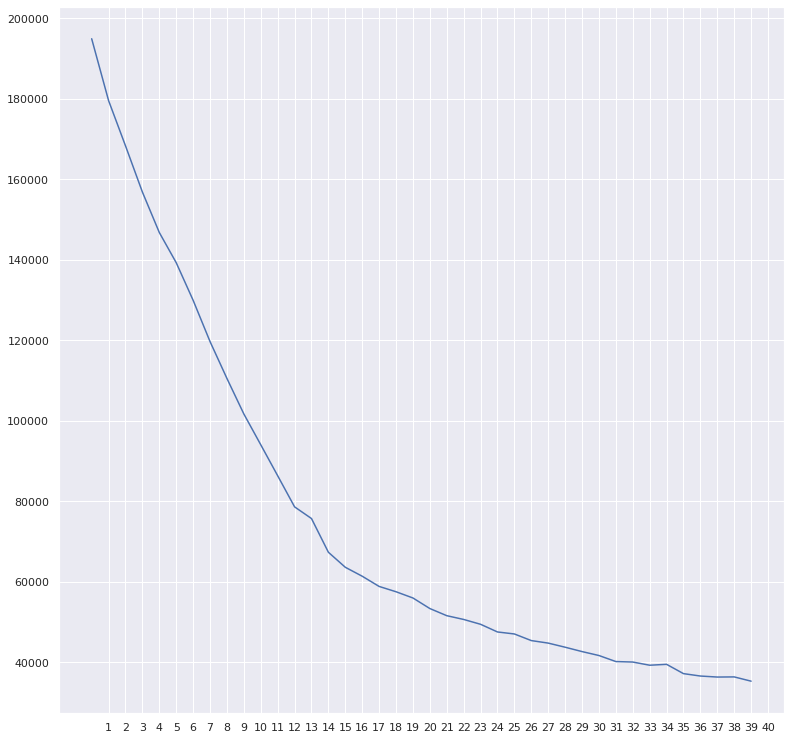

In [21]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f7769d668>,
      dtype=object)

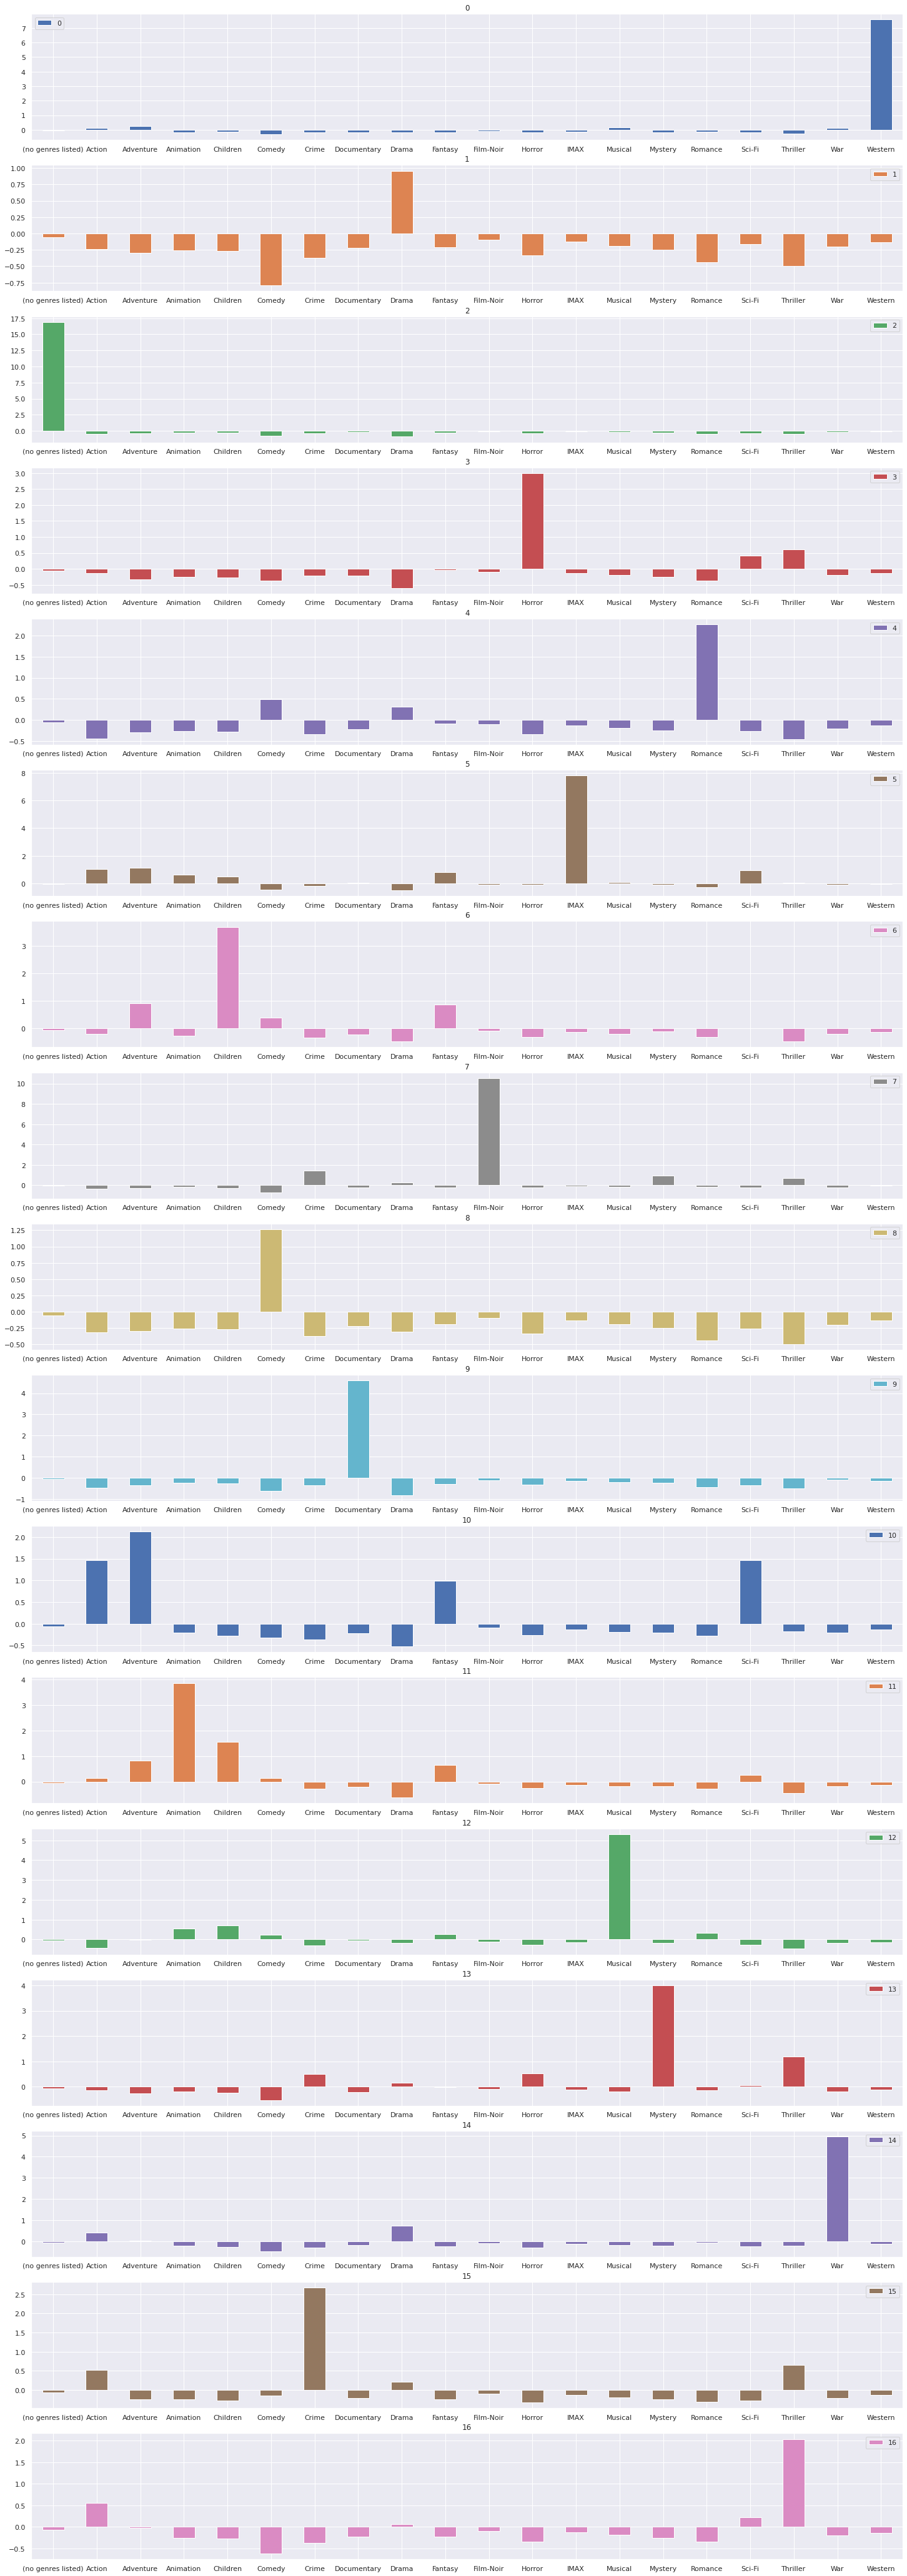

In [25]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,75),
                            sharex=False,
                            rot=0)

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
modelo = AgglomerativeClustering(n_clusters=17)

grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [28]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 50.915436 , -33.249874 ],
       [ 46.025314 ,  37.423462 ],
       [-24.257105 ,  -4.2247257],
       ...,
       [  3.303412 , -18.379341 ],
       [ 38.57924  , -24.124235 ],
       [  8.909639 ,  21.271698 ]], dtype=float32)

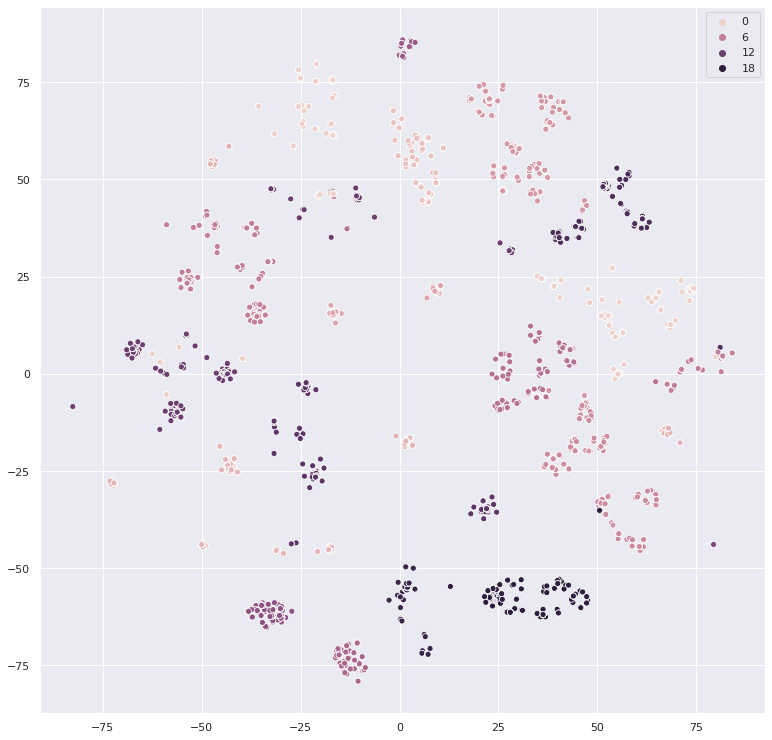

In [33]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos)

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage